In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

## Import

In [2]:
# Import tsv file ignoring all quotes within the file
dataset = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Cleaning

In [3]:
import re
from nltk import download as nltkdownload
nltkdownload('stopwords')                  # Download common-use words
from nltk.corpus import stopwords          # Importing all common words 
stop_words = stopwords.words('English')    # List of English stopwords
from nltk.stem.porter import PorterStemmer # Reducing the dimensions of sparse matrix by bringing similar words together

[nltk_data] Downloading package stopwords to /Users/adgb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
stop_words.remove('not')

In [5]:
# Remove punctuation
dataset['clean'] = dataset['Review'].apply(lambda x: re.sub("[^a-zA-Z']",' ',x))

# Replace capitals and remove trailing spaces
dataset['clean'] = dataset['clean'].apply(lambda x: x.lower().strip())

# Stem the words
ps = PorterStemmer()

# Create stemmed sentences
dataset['clean'] = dataset['clean'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in stop_words]))

In [6]:
dataset.head(10)

,Review,Liked,clean
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust not good
2,Not tasty and the texture was just nasty.,0,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price
5,Now I am getting angry and I want my damn pho.,0,get angri want damn pho
6,Honeslty it didn't taste THAT fresh.),0,honeslti tast fresh
7,The potatoes were like rubber and you could te...,0,potato like rubber could tell made ahead time ...
8,The fries were great too.,1,fri great
9,A great touch.,1,great touch


## Bag of words model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cv = CountVectorizer()

In [9]:
# Create our list of features
X = cv.fit_transform(dataset['clean'].values).toarray()
y = dataset['Liked'].values

# Training

In [10]:
from collections import defaultdict

In [11]:
models = defaultdict(dict)

## Train-test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

## Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [16]:
models['nb']['y_pred'] = classifier.predict(X_test)

## KNearest Neighbours

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
models['knn']['y_pred'] = classifier.predict(X_test)

## SVM

In [20]:
from sklearn.svm import SVC

In [21]:
classifier = SVC()
classifier.fit(X_test,y_test)

SVC()

In [22]:
models['svc']['y_pred'] = classifier.predict(X_test)

## Random Forest (gini)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
models['rf_gini']['y_pred'] = classifier.predict(X_test)

## Random Forest (entropy)

In [26]:
classifier = RandomForestClassifier(criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [27]:
models['rf_entropy']['y_pred'] = classifier.predict(X_test)

# Evaluation

In [62]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score

In [63]:
# Calculate evaluation metrics
for i in models:
    models[i]['accuracy'] = accuracy_score(y_test,models[i]['y_pred'])
    models[i]['f1'] = f1_score(y_test,models[i]['y_pred'])
    models[i]['precision'] = precision_score(y_test,models[i]['y_pred'])
    models[i]['recall'] = recall_score(y_test,models[i]['y_pred'])
    models[i]['cf'] = confusion_matrix(y_test,models[i]['y_pred'])

# Visualisation

In [30]:
import seaborn as sns

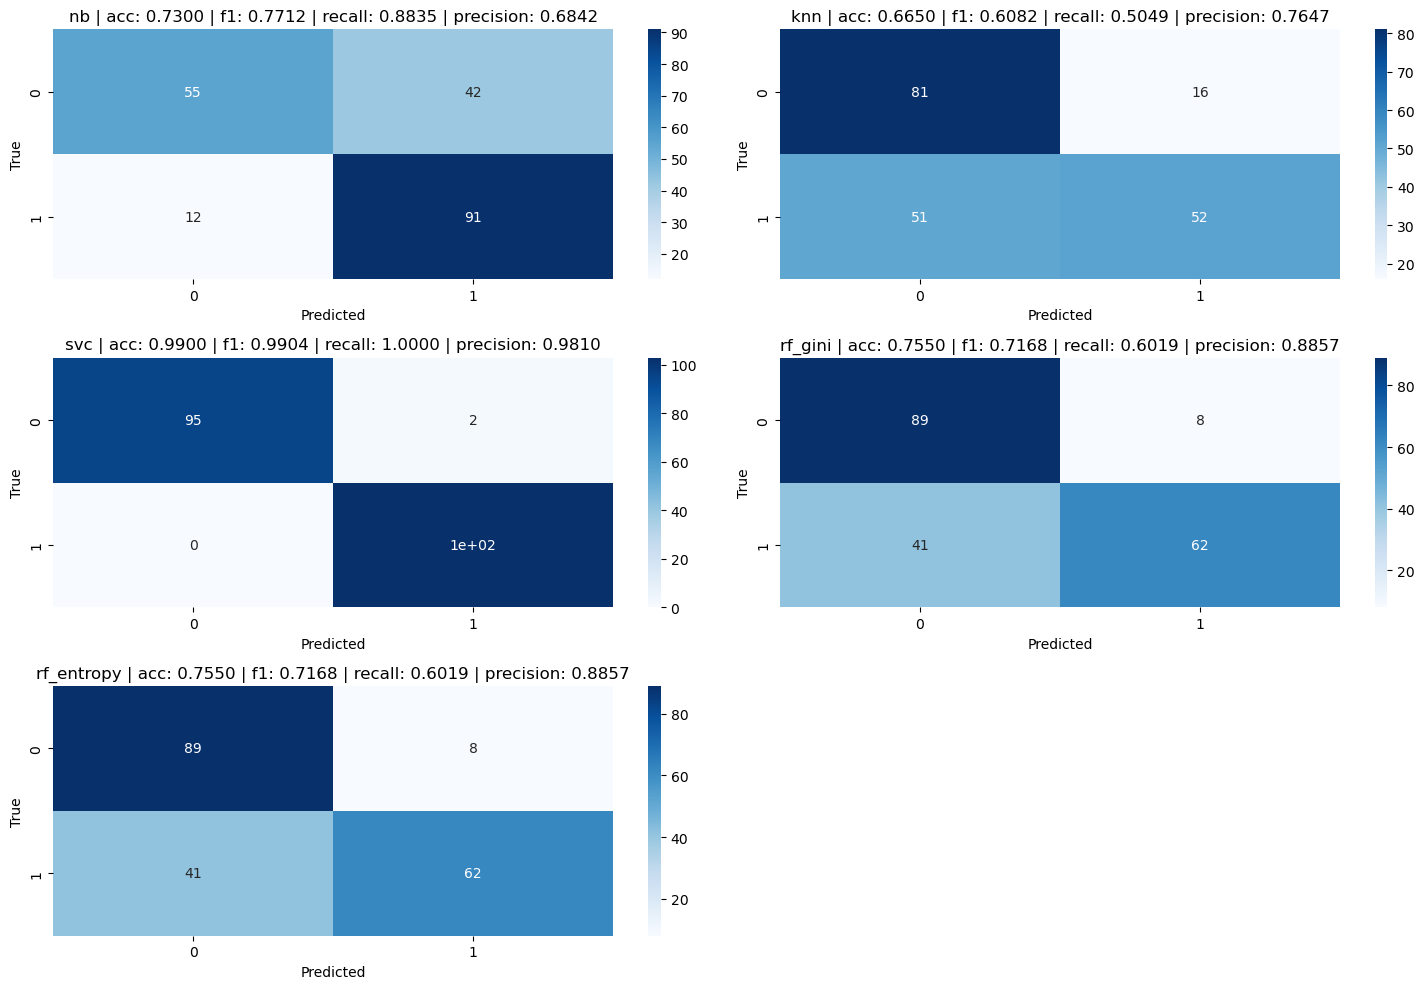

In [64]:
fig, axs = plt.subplots(3,2,figsize=(15,10))
axs = axs.flatten()

for i,v in enumerate(models):
    # Plot confusion matrices
    sns.heatmap(models[v]['cf'],annot=True,cmap='Blues',ax=axs[i])

    # Titles and axis labels
    axs[i].set_title(f'{v} | acc: {models[v]["accuracy"]:.4f} | f1: {models[v]["f1"]:.4f} | recall: {models[v]["recall"]:.4f} | precision: {models[v]["precision"]:.4f}')
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('True')

# Remove empty plots
for i in range(len(models),len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()